# Radiative Boundary Conditions

In [1]:
<< xAct`xTras`

------------------------------------------------------------
Package xAct`xPerm`  version 1.2.3, {2015, 8, 23}
CopyRight (C) 2003-2020, Jose M. Martin-Garcia, under the General Public\
 
>   License.
Connecting to external mac executable...
Connection established.
------------------------------------------------------------
Package xAct`xTensor`  version 1.2.0, {2021, 10, 17}
CopyRight (C) 2002-2021, Jose M. Martin-Garcia, under the General Public\
 
>   License.
------------------------------------------------------------
Package xAct`xPert`  version 1.0.6, {2018, 2, 28}
CopyRight (C) 2005-2020, David Brizuela, Jose M. Martin-Garcia and Guillermo\
 
>   A. Mena Marugan, under the General Public License.
** Variable $PrePrint assigned value ScreenDollarIndices
** Variable Prefix changed from Prefix to Postfix
** Option AllowUpperDerivatives of ContractMetric changed from False to True
** Option MetricOn of MakeRule changed from None to All
** Option ContractMetrics of MakeRule changed 

#### Define Symbols

In [2]:
Do[DefConstantSymbol[ToExpression["v" <> ToString[ii]], PrintAs -> ToString[Subscript["v", ToString[ii]], FormatType -> StandardForm]], {ii, 1, 3}];
Do[DefConstantSymbol[ToExpression["s" <> ToString[ii]], PrintAs -> ToString[Subscript["s", ToString[ii]], FormatType -> StandardForm]], {ii, 1, 3}];
DefConstantSymbol[sv, PrintAs -> "\*StyleBox[\(\!\(\*StyleBox[\"s\",\nFontWeight->\"Bold\"]\)\[Bullet]\!\(\*StyleBox[\"v\",\nFontWeight->\"Bold\"]\)\)]"];

** DefConstantSymbol: Defining constant symbol v1. 
** DefConstantSymbol: Defining constant symbol v2. 
** DefConstantSymbol: Defining constant symbol v3. 
** DefConstantSymbol: Defining constant symbol s1. 
** DefConstantSymbol: Defining constant symbol s2. 
** DefConstantSymbol: Defining constant symbol s3. 
** DefConstantSymbol: Defining constant symbol sv. 


## Scalar Waves

$$
\begin{align}
  \partial_t{u}
  &=\rho, \\
  \partial_t{\rho}
  &=\partial_kv_k, \\
  \partial_t{v_k}
  &=\partial_k \rho.
\end{align}
$$

where $v_k\equiv\partial_ku$.

u

ρ

v1

v2

v3
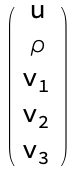

In [5]:
U = {u, \[Rho], v1, v2, v3};
U//MatrixForm

#### Replacement Rules

2     2     2          2     2     2
{s1  + s2  + s3  -> 1, -s1  - s2  - s3  -> -1, s1 v1 + s2 v2 + s3 v3 -> sv, 
 
>   -(s1 v1) - s2 v2 - s3 v3 -> -sv}
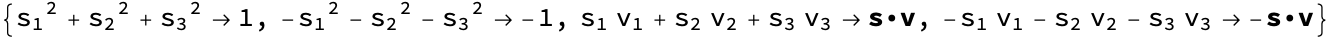

In [7]:
cnd = {
    s1^2+s2^2+s3^2 -> 1,
    -s1^2-s2^2-s3^2 -> -1,
    s1 v1+s2 v2+s3 v3 -> sv,
    -s1 v1-s2 v2-s3 v3 -> -sv
}

### Characteristic matrix with respect to normal $s_i$: $A^{\mathbf{s}\alpha}{}_\beta$

0     0     0     0     0

0     0     -s1   -s2   -s3

0     -s1   0     0     0

0     -s2   0     0     0

0     -s3   0     0     0
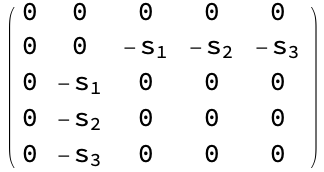

In [8]:
As = {
    {0, 0, 0, 0, 0},
    {0, 0, -s1, -s2, -s3},
    {0, -s1, 0, 0, 0},
    {0, -s2, 0, 0, 0},
    {0, -s3, 0, 0, 0}
};
As//MatrixForm

0

-sv

-(s1 ρ)

-(s2 ρ)

-(s3 ρ)
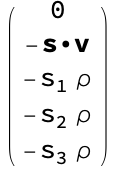

In [10]:
As.U/.cnd//MatrixForm

### Characteristic Fields

$$U^{\hat{\alpha}}=e^{\hat{\alpha}}{}_\beta U^{\beta}$$

0

0

0

-1

1
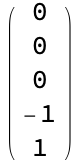

In [11]:
eValue = Eigenvalues[As]/.cnd;
eValue//MatrixForm

#### Left Eigenvectors

where $e^{\hat{\alpha}}{}_\beta$ is the **LEFT** eigenvectors of $A^{\mathbf{s}\alpha}{}_{\beta}$
$$e^{\hat{\alpha}}{}_\mu A^{\mathbf{s}\mu}{}_\beta=v^{(\hat{\alpha})}e^{\hat{\alpha}}{}_\beta$$

$$
\begin{align*}
e^{\hat{\alpha}}{}_\beta=
\begin{pmatrix}
1 &0 &0 \\
0 &1 &s^k \\
0 &1 &-s^k \\
0 & 0 &\delta_j{}^k-s_js^k
\end{pmatrix}
\end{align*}
$$

1           0           0           0           0


0           1           s1          s2          s3


0           1           -s1         -s2         -s3

                          2     2
0           0           s2  + s3    -(s1 s2)    -(s1 s3)

                                      2     2
0           0           -(s1 s2)    s1  + s3    -(s2 s3)

                                                  2     2
0           0           -(s1 s3)    -(s2 s3)    s1  + s2
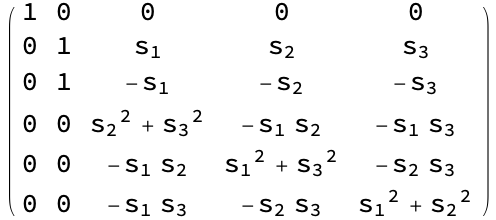

In [13]:
Module[{eLeftVectorRaw = (Inverse[Transpose[Eigenvectors[As]/.cnd]]//Simplify)/.cnd},
eLeftVector = Join[
    {eLeftVectorRaw[[3]]},
    {eLeftVectorRaw[[4]] (2/s3)},
    {-eLeftVectorRaw[[5]] (2/s3)},
    {
        -(eLeftVectorRaw[[2]] (s2/s1) + eLeftVectorRaw[[1]] (s3/s1))//Simplify,
        eLeftVectorRaw[[2]],
        eLeftVectorRaw[[1]]
    }
]];
eLeftVector//MatrixForm

In [15]:
eLeftVector[[1]].As - eLeftVector[[1]]eValue[[1]]

{0, 0, 0, 0, 0}

{0, -2, -2 s1, -2 s2, -2 s3}
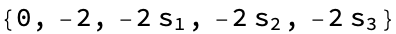

In [16]:
eLeftVector[[2]].As - eLeftVector[[2]]eValue[[5]]/.cnd

{0, 2, -2 s1, -2 s2, -2 s3}
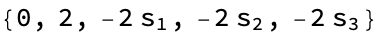

In [17]:
eLeftVector[[3]].As - eLeftVector[[3]]eValue[[4]]/.cnd

In [18]:
Table[(eLeftVector[[i]].As - eLeftVector[[i]]eValue[[1]]//Simplify)/.cnd, {i,4,6}]

{{0, 0, 0, 0, 0}, {0, 0, 0, 0, 0}, {0, 0, 0, 0, 0}}

$$
\begin{align}
  \begin{array}{lll}
    U^{\hat{0}}    &=u, \quad                          &\text{speed} \quad 0, \\
    U^{\hat{1}\pm} &=\rho\mp\mathbf{s}\cdot\mathbf{v},         &\text{speed} \quad \pm 1, \\
    U^{\hat{2}}    &=\mathbf{v}-\mathbf{s}(\mathbf{s}\cdot\mathbf{v}), &\text{speed} \quad 0.
  \end{array}
\end{align}
$$

u


sv + ρ


-sv + ρ

   2     2
(s2  + s3 ) v1 - s1 s2 v2 - s1 s3 v3

                 2     2
-(s1 s2 v1) + (s1  + s3 ) v2 - s2 s3 v3

                            2     2
-(s1 s3 v1) - s2 s3 v2 + (s1  + s2 ) v3
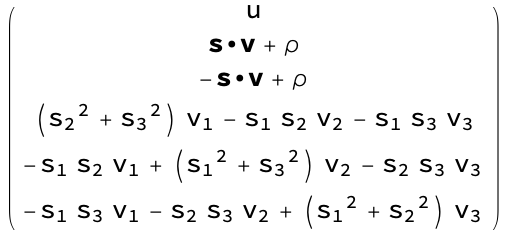

In [19]:
(eLeftVector.U)/.cnd//MatrixForm

#### Right Eigenvectors (left inverse of Left Eigenvectors)

and $e^{\alpha}{}_{\hat{\beta}}$ is the **RIGHT** eigenvector of $A^{\mathbf{s}\alpha}{}_{\beta}$
$$A^{\mathbf{s}\alpha}{}_\mu e^{\mu}{}_{\hat{\beta}} =v_{(\hat{\beta})}e^{\alpha}{}_{\hat{\beta}}$$

$$
\begin{align*}
e^{\alpha}{}_{\hat{\beta}}=
\begin{pmatrix}
1 &0 &0 &0\\
0 &1/2 &1/2 &0 \\
0 &s_j/2 &-s_j/2 &\delta_j{}^k \\
\end{pmatrix}
\end{align*}
$$

1         0         0         0         0         0

          1         1
          -         -
0         2         2         0         0         0

          s1          1
          --        -(-) s1
0         2           2       1         0         0

          s2          1
          --        -(-) s2
0         2           2       0         1         0

          s3          1
          --        -(-) s3
0         2           2       0         0         1
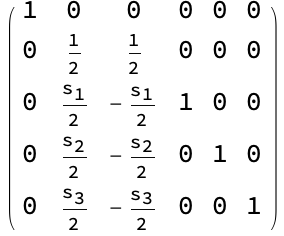

In [40]:
(*eRightVector = PseudoInverse[eLeftVector]*)
eRightVector = {
    {1, 0, 0, 0, 0, 0},
    {0, 1/2, 1/2, 0, 0, 0},
    {0, s1/2, -s1/2, 1, 0, 0},
    {0, s2/2, -s2/2, 0, 1, 0},
    {0, s3/2, -s3/2, 0, 0, 1}
};
eRightVector//MatrixForm

It's left inverse of $e^{\hat{\alpha}}{}_{\beta}$
$$e^{\alpha}{}_{\hat{\gamma}}e^{\hat{\gamma}}{}_\beta=\delta^\alpha{}_{\beta}$$

1   0   0   0   0

0   1   0   0   0

0   0   1   0   0

0   0   0   1   0

0   0   0   0   1
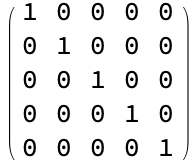

In [45]:
eRightVector.eLeftVector/.cnd//MatrixForm

But not the right inverse
$$e^{\hat{\alpha}}{}_{\gamma}e^{\gamma}{}_{\hat{\beta}}\neq \delta^{\hat{\alpha}}{}_{\hat{\beta}}$$

1                     0                     0                     0
 



>       0                     0

                            2     2     2         2     2     2
                      1 + s1  + s2  + s3    1 - s1  - s2  - s3
                      -------------------   -------------------
0                              2                     2            s1
 



>       s2                    s3

                            2     2     2         2     2     2
                      1 - s1  - s2  - s3    1 + s1  + s2  + s3
                      -------------------   -------------------
0                              2                     2            -s1
 



>       -s2                   -s3



                                                                    2     2
0                     0                     0                     s2  + s3
 



>       -(s1 s2)              -(s1 s3)




0                     0                     0                     -(s1 s2)
 


          2     2
>       s1  + s3              -(s2 s3)




0                     0                     0                     -(s1 s3)
 


                                2     2
>       -(s2 s3)              s1  + s2
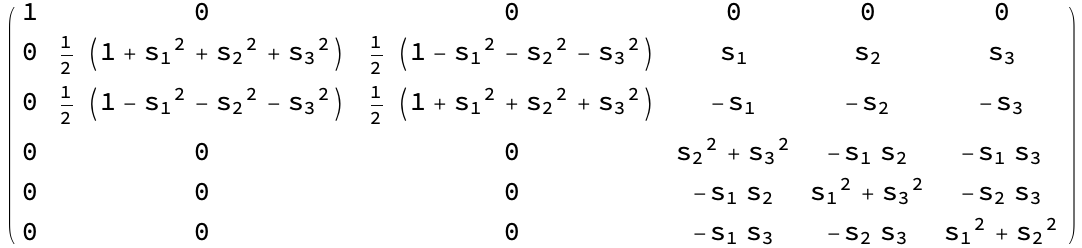

In [49]:
eLeftVector.eRightVector/.cnd//Simplify//MatrixForm

### Radiative Boundary Condition

$$U^{\hat{1}-}=0$$